# Ejercicio 7

El circuito de la figura corresponde amplificador de potencia de RF sintonizado, realizado con un MOSFET, para una portadora de $f = 10 MHz$.

El amplificador de la figura trabaja en clase B

![ex 2.13](fig/circuitoClaseC.png)


Para este proyecto se busca máxima excursión de señal para un amplificador de RF Clase B. 

Se asume la impedancia del dispositivo a su salida entre  Drain  y Source es lo suficientemente elevada como para desestimarla frente a la carga.

|Symbol        | Parameter                  | Value     | Unit     |   
|--------------|----------------------------|-----------|----------|
|$V_{(BR)DSS}$ |  Drain source voltage      | $125$     | V        |
|$V_{GS}$      |  Gate source voltage       | $\pm 20$  | V        |
|$I_{D}$       |  Drain current             | $10$      | A        |
|$V_{(min)DS}$ |  Drain source voltage min. | $10$      | V        |

Impedancia de entrada del MOSFET a $f = 10MHz$ 
$$Z_{in}  = (4 -2j) \Omega$$ 

Impedancia de salida del MOSFET   a $f = 10MHz$ 
$$Z_{out} = (80-2j)  \Omega$$ 

![ex 2.13](fig/mosfet_BF177.png)

https://www.ampleon.com/documents/data-sheet/BLF177_N.pdf



La tensión de excitación en Gate es una señal BLU.

La señal de BLU formada por dos tonos de igual nivel y frecuencias $f_1=9.99 MHz$ y  $f_2=10.01 MHz$


El Q cargado de ambos tanques (Gate y  Drain) es de $Q_C = 10$ y el  $Q_{oL} = Q_{oC} = infinito$ de los elementos reactivos es infinito. 

La tensión de fuente es de $V_{DD} = 50V$. 

Potencia en la carga $P_L = 150 W$. 


 
Recordatorio de identidad trigonometrica

$cos(\alpha)+ cos(\beta) = 2 cos(\frac{\alpha + \beta}{2}) +  cos(\frac{\alpha - \beta}{2})$

$cos(x) cos(y) =  \frac{1}{2} (cos(x+y) +  cos(x - y))$


Determinar:

   1. $V_{GG}$ y $V_{s}$ (tener en cuenta que la señal es AM) 
   2. Componentes fundamentales de la corriente de drain Id1(f1), Id1(f2)
   3. Componentes de IDM de 3er orden de la corriente de drain 
   4. Componentes de IDM de 5to orden de la corriente de drain 
   5. $R_{o}$ para maxima escursión de la salida (dada la fuente de alimentación).
   6. $P_{dc}$.
   7. $P_{tr}$ 
   8. Rendimiento.
   9. Ganancia de potencia
   10. Rendimiento
   


![ex 2.13](fig/circuitoClaseC_mosfet_1.png)


1Definiciones de los distintos tipos de intermodulación en el transmisor

Los  productos  de  intermodulación  son  generados  por  las  no  linealidades  del  amplificador  de  salida  deltransmisor  (por ejemplo,  los  semiconductores,  los  klystrons,  etc.)  y  de  los  dispositivos  pasivos  tales  como  combinadores,  circuladores, conectores, etc.

Los productos de intermodulación a la frecuencia $f_{IM}$ son generados por dos o más señales no deseadas alas frecuencias $f_1$, $f_2$, a causa de las no linealidades en la salida de un transmisor. 
La relación entre $f_{IM}$ y $f_1$, $f_2$, puede expresarse de forma muy general:

$f_{IM}= |m_1 f_1 + m_2 f_2|$

con $m= 0, 1, 2,$ 

El  orden  del  producto  de  intermodulación  viene  dado  por $n=m1+m2$.  
Ello  significa  que  la  frecuencia  para productos de intermodulación de segundo orden, IM2 siendo, n=2,m1=m2=1 da lugar a una $f_{IM}=f1f2y que la frecuencia  de  los  productos  de  intermodulación  de  tercer  orden IM3(n=3,m1=2,m2=1)  es fIM=2f1f2o  fIM=2f2f1siendo m1=1, m2=2.  Los  productos  2f1–f2y  2f2−f1son  los  que  más  interesan  a  los  diseñadores puesto que a menudo vienen especificados en las normas, aunque los productos f1+f2–f3son de mayor magnitud y más numerosos si hay más de dos señales interferentes. En algunas aplicaciones también deben considerarse los productos de intermodulación  de  quinto  orden, IM5,  que  se  producen  para  3f1–2f2ó  3f2−2f1,  respectivamente.  En  la  Fig.1  se representa la relación entre los distintos productos de intermodulación.



Una tranferencia puede aproximarse empleando un polinomio
$i_d(v_{gs}) = k_0 + k_1 v_{gs} + k_2 v_{gs}^2 + ...  + k_n v_{gs}^n$  

Tambien

$i_d(v_{gs}) = \sum_{i=0}^{\inf} k_i  v_{gs}^i$  

Supongamos ahora que la señal de entrada corresponde un dos todos, como el caso de BLU. 

$v_{gs} = A (cos(x) + cos(y))$

Entonces


$i_d(v_{gs}) = \sum_{i=0}^{\inf} k_i  (a (cos(x) + cos(y)))^i$  



$(cos(a) + cos(b))^2 = \frac{1}{2} (2 + cos(2 a) + 2 cos(a - b) + cos(2 b) + 2 cos(a + b))$




$(cos(a) + cos(b))^3 = \frac{1}{4} (3 cos(a - 2 b) + 3 cos(2 a - b) + 3 cos(2 a + b) + 3 cos(a + 2 b) + 9 cos(a) + cos(3 a) + 9 cos(b) + cos(3 b))$


$(cos(x) + cos(y))^4 = \frac{1}{8} (4 cos(a - 3 b) + 6 cos(2 a - 2 b) + 24 cos(a - b) + 4 cos(3 a - b) + 24 cos(a + b) + 4 cos(3 a + b) + 6 cos(2 a + 2 b) + 4 cos(a + 3 b) + 16 cos(2 a) + cos(4 a) + 16 cos(2 b) + cos(4 b) + 18)$


$(cos(x) + cos(y))^5 = \frac{1}{16} (5 cos(a - 4 b) + 10 cos(2 a - 3 b) + 50 cos(a - 2 b) + 10 cos(3 a - 2 b) + 50 cos(2 a - b) + 5 cos(4 a - b) + 50 cos(2 a + b) + 5 cos(4 a + b) + 50 cos(a + 2 b) + 10 cos(3 a + 2 b) + 10 cos(2 a + 3 b) + 5 cos(a + 4 b) + 100 cos(a) + 25 cos(3 a) + cos(5 a) + 100 cos(b) + 25 cos(3 b) + cos(5 b))$



In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq
from time import time



from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (8, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 


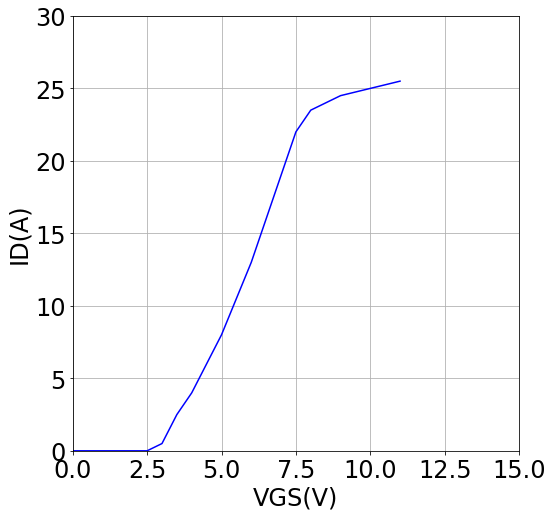

In [73]:
vgsd = np.array([0,1,2, 2.5,   3, 3.5, 4, 5,  6, 7, 7.5,    8,  9,  10, 11]) 
idsd = np.array([0,0,0,   0, 0.5, 2.5, 4, 8, 13, 19, 22,   23.5, 24.5, 25, 25.5]) 

plt.plot(vgsd,idsd,'b')
plt.axis([0, 15, 0, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()



In [79]:
orden = 5
z = np.polyfit((vgsd),idsd, orden)
print(np.poly1d(np.polyfit((vgsd),idsd, orden)))
p = np.poly1d(z)


          5           4          3         2
0.003164 x - 0.09023 x + 0.8236 x - 2.327 x + 2.037 x - 0.1286


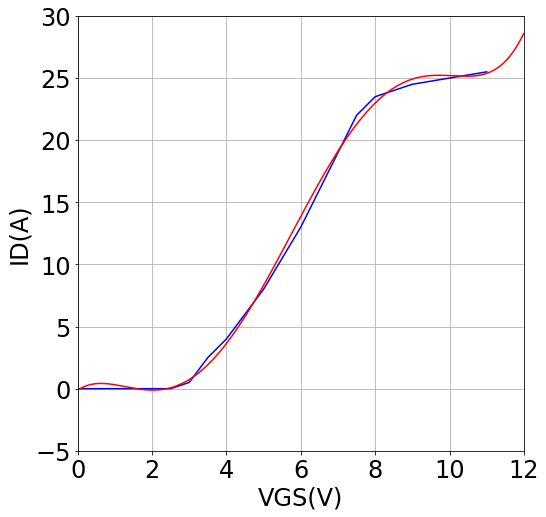

In [80]:
plt.plot(vgsd,idsd,'b')

vgsa = np.arange(-2.5,12,0.01)
plt.plot(vgsa,p(vgsa),'r')

plt.axis([0, 12, -5, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()

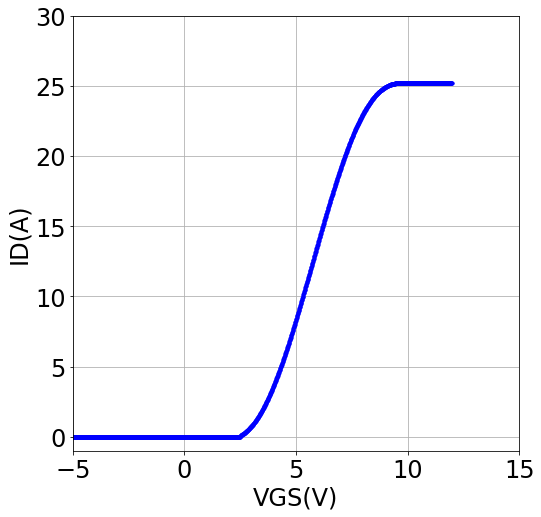

In [84]:
def idi(v):
    i =  0.             if (v < 2.5) else 0
    i = p(v) if (v >= 2.5  and v <  10) else i
    i = p(10) if (v >= 10 ) else i
    return i


vgsa = np.arange(-5,12,0.01)
idsa = []
for v in vgsa:
    idsa.append(idi(v))

plt.plot(vgsa,idsa,'b.')
plt.axis([-5, 15, -1, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()


In [96]:
#Calculos 
#parametros de la senal 
fc   =  10e6 #Hz
fm   = 100e3
th_c = np.pi

#tiempo de un periodo de la modulante
Tm  = 1/abs(fm)


# muestreo (empleando 24 ya que corresponde a el muestreo del empleado comunmente en el metodo de los trapecios)
ns  =  24    

#Muestreo
fs  =  ns*(fc)

#delta time para el calculo de los armonicos
ds  = 1/(fs)

### Para los calculos!
#tiempo de un periodo 
Tc  = 1/fc

   



#parametros del transistor
Vds_min = 10  #V
Vds_max = 125 #V

Vgs_max = 12 #V
Vth     = 2.5 #V



#parametros del filtro de entrada y de salida 
Qo = np.inf
Qc = 10

Zin     =  4-2j #ohms
Zout    = 80-2j #ohms

# Generador
Zg      = 50 #ohms

# Carga
Zl      = 50 #ohms
rlp     = 5.33
VDD     = 50 #V
PL      = 150 #W


In [97]:
#### 1

Vs  = (Vgs_max-Vth)/(1-np.cos(th_c/2))
VGG  = Vgs_max - Vs

print('$Vs  = {:.2f}$'.format(Vs))

print('$VGG = {:.2f}$'.format(VGG))

$Vs  = 9.50$
$VGG = 2.50$


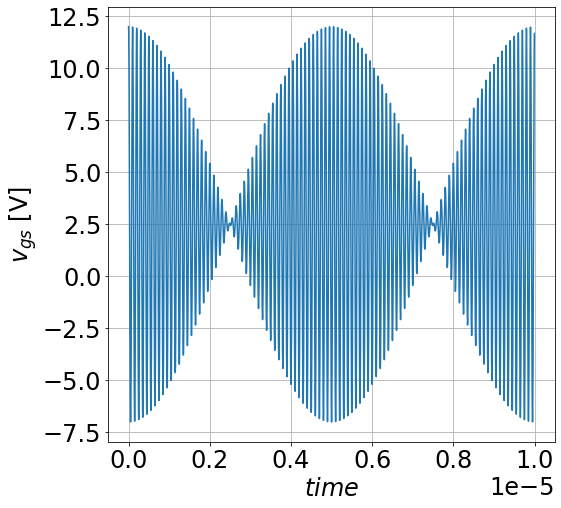

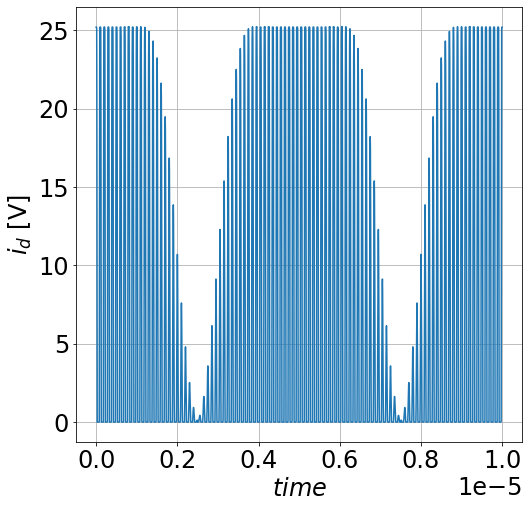

In [98]:
#### 4. $I_{do(pico)}$, $I_{d1(pico)}$

def vgsi(VGG,Vs,fm,fc,time):
    return VGG+Vs*(np.cos(2*np.pi*(fm)*time))*(np.cos(2*np.pi*(fc)*time))


time = np.arange(0,Tm,ds)

vgs = vgsi(VGG,Vs,fm,fc,time)

idd = np.array([idi(v) for v in vgs])


plt.plot(time, vgs)
plt.ylabel('$v_{gs}$ [V]')
plt.xlabel('${time}$')

plt.grid()
plt.show()


plt.plot(time, idd)
plt.ylabel('$i_{d}$ [V]')
plt.xlabel('${time}$')

plt.grid()
plt.show()


<ipython-input-99-cc220d655190>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(frq, np.abs(Fvgs)*2 )


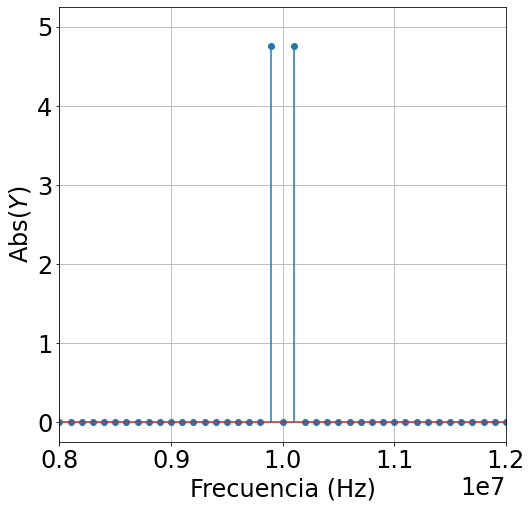

In [99]:
# FFT

Fvgs = fft(vgs) / len(vgs)  # Normalizada

frq = fftfreq(len(vgs), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fvgs)*2 )  

plt.xlim((fc)*0.8,(fc)*1.2)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

<ipython-input-100-dd152fcffde7>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(frq, (np.abs(Fidd)*2 )  )


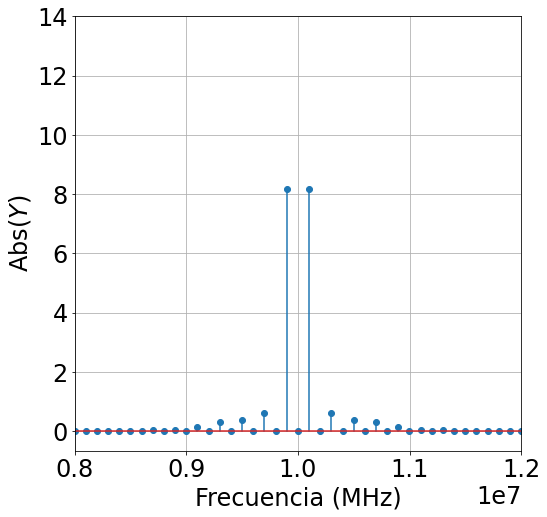

In [100]:
# FFT

Fidd = fft(idd) / len(idd)  # Normalizada

frq = fftfreq(len(idd), ds)  # Recuperamos las frecuencias

plt.stem(frq, (np.abs(Fidd)*2 )  )

plt.xlim((fc)*0.8,(fc)*1.2)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()